In [4]:
import control
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("l1_ham8_plant_xyz.txt")
f = data[:, 0]
z_real = data[:, 5]
z_imag = data[:, 6]
z_tf = z_real + 1j*z_imag

s = control.tf("s")
wn = 1*2*np.pi
q = 1/np.sqrt(2)
gs13_inv = (s**2+wn/q*s+wn**2) / s**3

z_tf *= gs13_inv(1j*2*np.pi*f)

In [5]:
f_ = np.logspace(-2, 2, 1024)

n_seis = 1/f_ * 0.05
n_gs13 = abs(((s**2+wn/q*s+wn**2) / s**3)(1j*2*np.pi*f_)) * 0.005
n_cps = np.ones_like(f_) * 0.01
wg = 0.15*2*np.pi
qg = 5
xg = abs((wg**2 / (s**2+wg/qg*s+wg**2) * (s+(0.3*2*np.pi))/(0.3*2*np.pi) * 1)(1j*2*np.pi*f_)) 

In [6]:
wc = 10*2*np.pi
k = (s+wc)/(wc) * (50*2*np.pi)/(s+50*2*np.pi) * 10
p = model

kp = k*p
pg = p/abs(p(0))

NameError: name 'model' is not defined

In [7]:
w_sc = 0.05*2*np.pi
q_sc = 2
h_sc = (s**2) / (s**2+w_sc/q_sc*s+w_sc**2)

In [8]:
import kontrol
import kontrol.complementary_filter.predefined

d = abs(pg(1j*2*np.pi*f_)) * xg
n_sc = kontrol.core.math.quad_sum(n_cps, abs(h_sc(1j*2*np.pi*f_))*n_seis, abs((1-h_sc)(1j*2*np.pi*f_))*xg)

h1, h2 = kontrol.complementary_filter.predefined.sekiguchi([0.1*2*np.pi])

n = kontrol.core.math.quad_sum(abs(h1(1j*2*np.pi*f_))*n_sc, abs(h2(1j*2*np.pi*f_))*n_gs13)

x = kontrol.core.math.quad_sum(abs((1/(1+kp))(1j*2*np.pi*f_))*d, abs((kp/(1+kp))(1j*2*np.pi*f_))*n)

NameError: name 'pg' is not defined

In [ ]:
# plt.loglog(f_, xg, label="Seismic noise")
# plt.loglog(f_, abs(h_sc(1j*2*np.pi*f_)))
# plt.loglog(f_, n_sc)
# plt.loglog(f_, n_seis, label="STS")
# plt.loglog(f_, n_gs13, label="GS-13")
# plt.loglog(f_, n_cps, label="CPS")
plt.loglog(f_, d)
plt.loglog(f_, n)
plt.loglog(f_, x)
# plt.loglog(f_, abs(h1(1j*2*np.pi*f_)))
# plt.loglog(f_, abs(h2(1j*2*np.pi*f_)))
plt.grid(which="both")
plt.legend(loc=0)


In [9]:
import vishack

data_xml = vishack.data.diaggui.Diaggui("ham7-ff-plant-trans-tf-data.xml")
# data_xml.items

In [10]:
w1 = 1.875*2*np.pi
q1 = 1/0.7
model = w1**2 / (s**2+w1/q1*s+w1**2) * 6

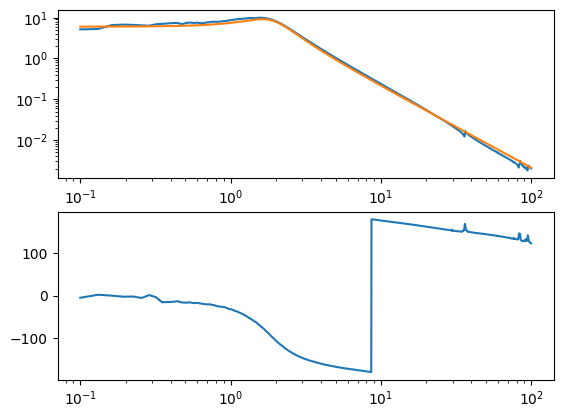

In [11]:
plt.subplot(211)
plt.loglog(f, abs(z_tf))
plt.loglog(f, abs(model(1j*2*np.pi*f)))

plt.subplot(212)
plt.semilogx(f, np.angle(z_tf, deg=True))